select domain, to_date(timestamp_utc) as date, 
stddev(active_page_dwell) / nullif(avg(active_page_dwell),0) as apd,
stddev(time_until_scroll) / nullif(avg(time_until_scroll),0) as tus,
stddev(time_until_inview) / nullif(avg(time_until_inview),0) as tui,
stddev(time_until_hover) / nullif(avg(time_until_hover),0) as tuh,
stddev(total_exposure_time) / nullif(avg(total_exposure_time),0) as tet,
size, format, execution
from arion.prod.fact_moat_viewability
where time_id_utc >= 2017010100 and time_id_utc < 2017090100
and domain in ('cnn.com', 'littlethings.com', 'metrolyrics.com')
group by domain, date, size, format, execution
order by date asc;

# Section 1: Network-wide Volatility

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [38]:
f_df = pd.read_csv('D:\\Kargo\\Risk Analysis\\ytd_volatility.csv').dropna()
f_df.head()

,DATE,APD,TUS,TUI,TUH,TET,SIZE,FORMAT,EXECUTION
0,2017-01-01,2.541787,4.379907,1.024844,24.804379,3.160760,1x1,Hover,standard
1,2017-01-01,1.795197,3.304880,3.772512,5.199654,2.093976,300x250,MiddleBanner,standard
2,2017-01-01,3.057395,5.226938,2.485423,8.949996,3.448402,1x1,SideKick,animated
3,2017-01-01,2.666437,4.573147,2.885045,14.434044,3.298156,1x1,Anchor,slide_to_reveal
4,2017-01-01,2.786236,4.785881,2.181148,19.537655,3.790191,320x50,Hover,product_gallery


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002267F64B668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002267F1AF8D0>], dtype=object)

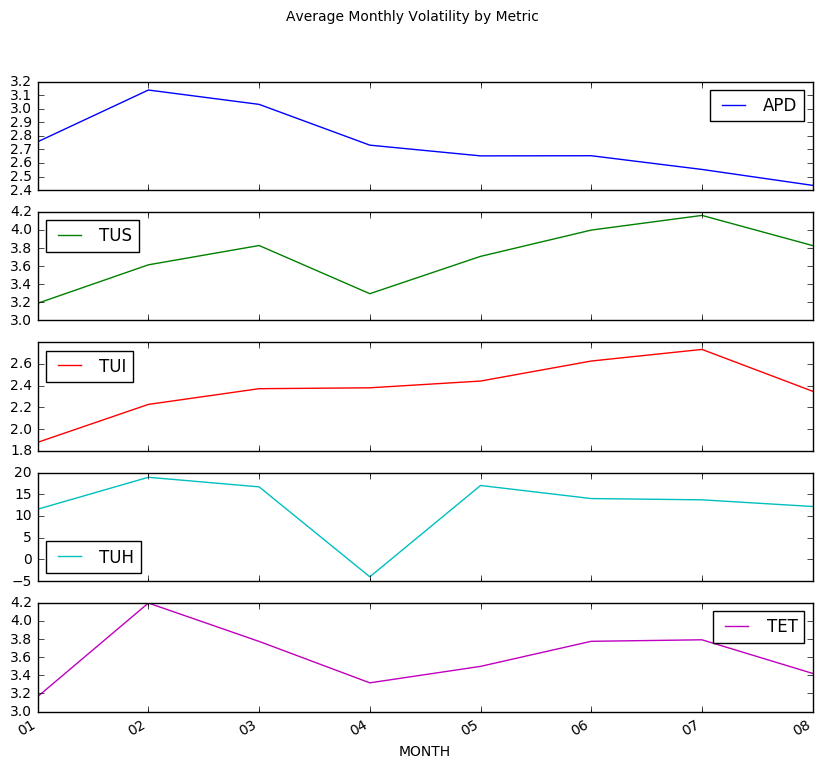

In [53]:
def getMonth(date):
    return str(date).split('-')[1]

f_df['MONTH'] = df['DATE'].apply(lambda x: getMonth(x))
df.groupby('MONTH').mean().plot(subplots=True, title="Average Monthly Volatility by Metric", figsize=(10,9))

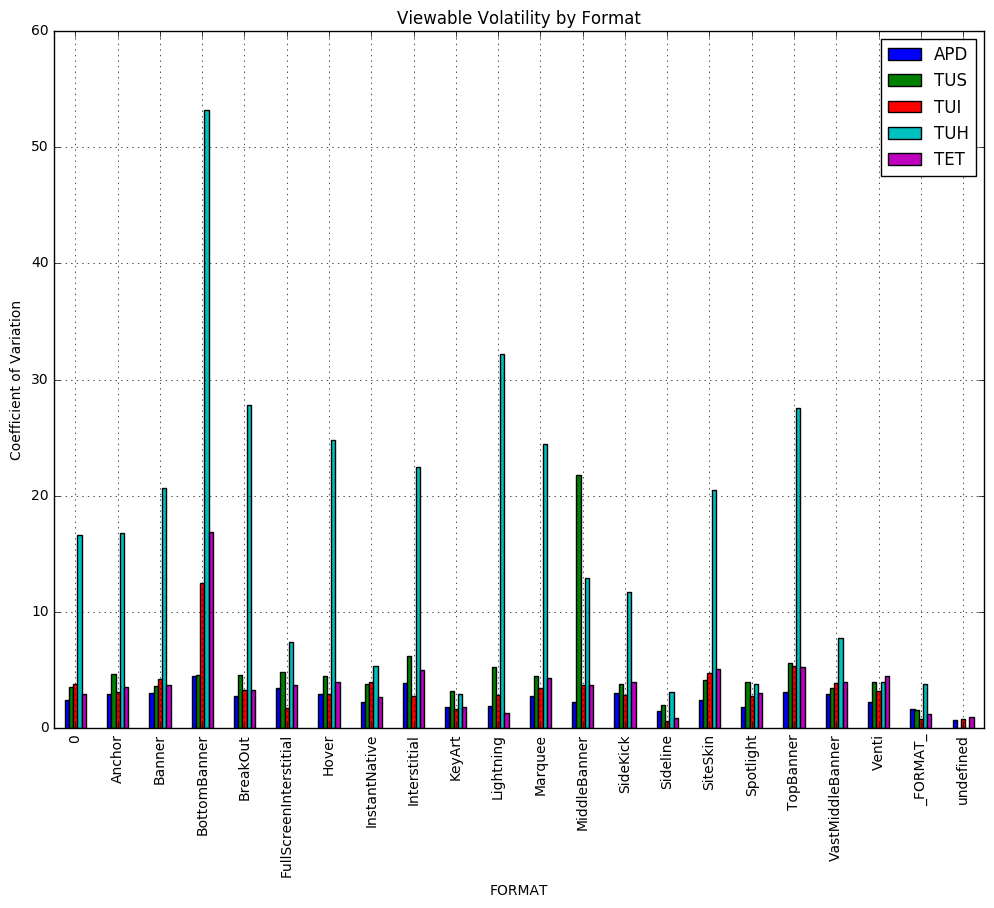

In [61]:
f_df.groupby('FORMAT').mean().plot(kind="bar", figsize=(12,9), title="Viewable Volatility by Format", grid=True).set_ylabel("Coefficient of Variation")

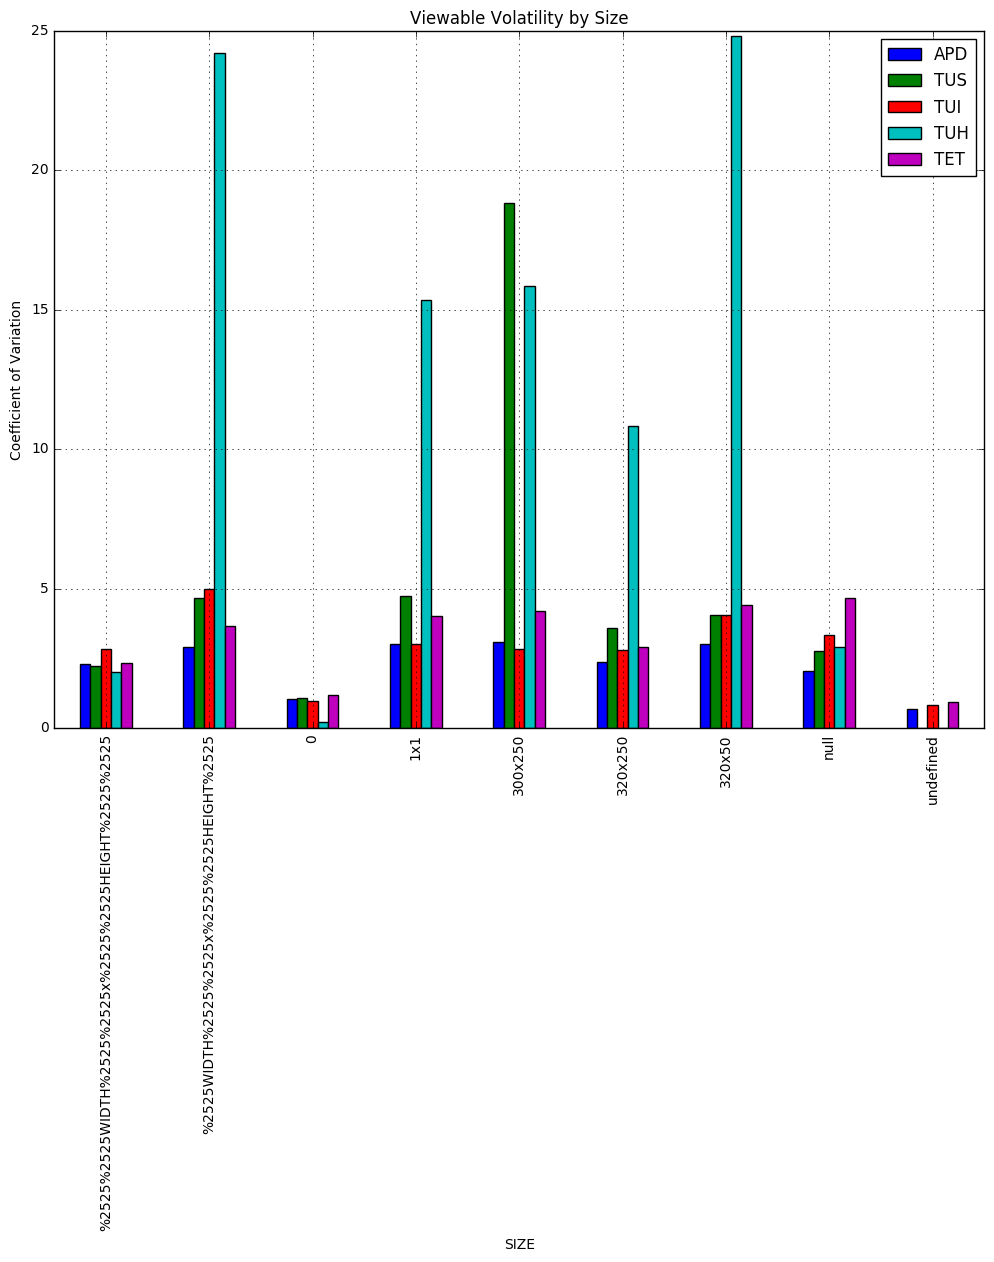

In [63]:
f_df.groupby('SIZE').mean().plot(kind="bar", figsize=(12,9), title="Viewable Volatility by Size", grid=True).set_ylabel("Coefficient of Variation")

# Section 2: Pub Comparison (Littlethings, CNN and Metrolyrics)
Volatility in APD on decline since 1Q16 with TET roughly correlated
Banner units have tremendous viewable volatility even on pages with stable APD
Lightning units have lowest volatility in APD and TET

In [4]:
df = pd.read_csv('D:\\Kargo\\Risk Analysis\\ytd_cv_trio.csv')
df.dropna()[:10]

,DOMAIN,DATE,APD,TUS,TUI,TUH,TET,SIZE,FORMAT,EXECUTION
0,littlethings.com,2017-01-01,3.197404,1.853421,1.421871,14.789789,2.176249,1x1,Anchor,animated
2,metrolyrics.com,2017-01-01,1.416323,1.589738,0.211073,1.736609,0.300403,1x1,FullScreenInterstitial,nbdb
4,littlethings.com,2017-01-01,3.108369,5.154001,0.537099,5.739678,1.176092,300x250,Interstitial,social_hijack
6,littlethings.com,2017-01-01,3.128900,4.009569,2.056836,64.736890,3.563306,320x50,Hover,animated
9,cnn.com,2017-01-01,1.409178,0.000000,1.415896,-0.000000,1.414214,1x1,Interstitial,kstream
10,cnn.com,2017-01-01,2.394266,4.221593,1.469125,63.533581,2.667603,320x50,Hover,animated
12,cnn.com,2017-01-01,2.557412,4.060202,0.764467,-0.000000,2.795386,1x1,Hover,scroll_reactive
13,littlethings.com,2017-01-01,3.510589,4.866308,2.250679,18.078883,4.460867,320x50,Hover,shake
14,cnn.com,2017-01-01,2.395800,2.975680,0.945117,13.377536,2.634868,320x50,Hover,glider
16,littlethings.com,2017-01-01,1.187466,0.859527,1.204555,-0.000000,1.124845,1x1,Interstitial,standard


In [8]:
df['MONTH'] = df['DATE'].apply(lambda x: getMonth(x))
df.groupby('MONTH').mean()

,APD,TUS,TUI,TUH,TET
MONTH,,,,,
01,2.756049,3.190073,1.878186,11.557911,3.164701
02,3.137225,3.614678,2.227331,18.907524,4.198293
03,3.031528,3.828041,2.371902,16.702663,3.774245
04,2.731169,3.295859,2.380026,-4.000093,3.316675
05,2.652228,3.708107,2.442282,17.018330,3.498416
06,2.653255,3.998583,2.626541,14.010025,3.775452
07,2.552322,4.160679,2.733475,13.718526,3.792176
08,2.434955,3.827367,2.348249,12.181627,3.420653


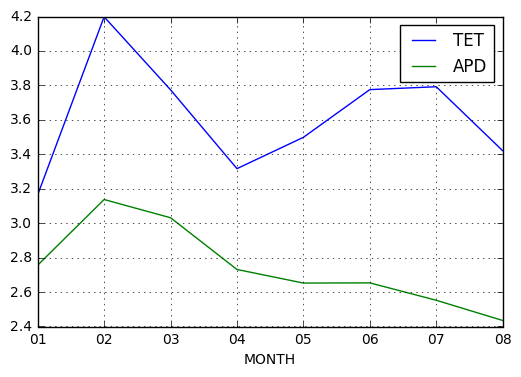

In [27]:
df.groupby('MONTH')['TET','APD'].mean().plot(grid=True, legend=True)

Interesting, the volatility of APD has declined since Q1

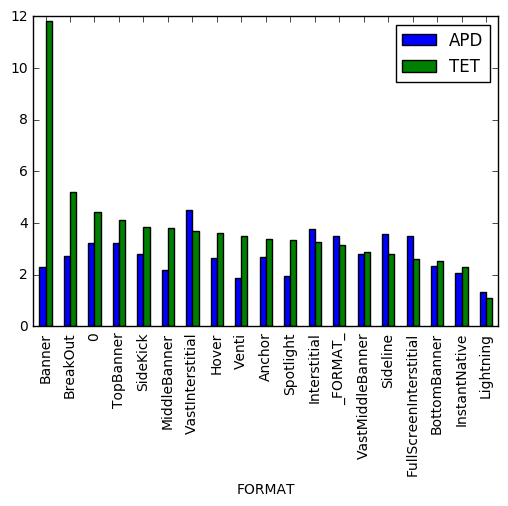

In [25]:
df.pivot_table(['APD','TET'],'FORMAT').dropna().sort_values(by='TET',ascending=False).plot(kind="bar")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002267CBED828>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002267CE6D390>], dtype=object)

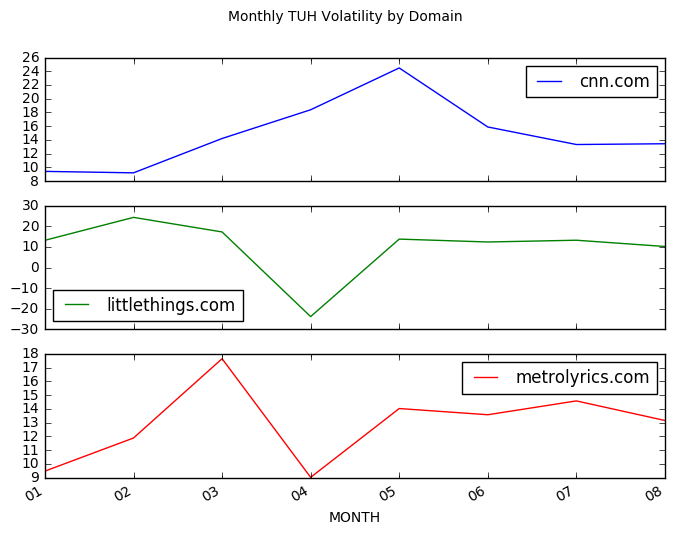

In [30]:
df.pivot_table('TUH','MONTH','DOMAIN').plot(subplots=True, title="Monthly TUH Volatility by Domain", figsize=(8,6))